# Hall effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.constants as cte
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
%matplotlib inline

In [2]:
path_figs = './Figs/'
save_figs = False
def save_fig(fig, name):
    fig.savefig(path_figs + name + '.png', dpi=300)
    fig.savefig(path_figs + name + '.eps', dpi=300)

## Calibration magnetic field

Calibration of magnetic sensor is: 0.1172 T/mV at 10 mA

In [3]:
I1 = np.arange(0,16)
V1 = np.array([0.060,0.405,0.743,1.098,1.437,1.775,2.100,2.432,2.766,3.080,3.419,3.739,4.051,4.374,4.682,4.977])
c = 0.1172
B = V1[13] * c

In [4]:
err_B = np.abs(V1) * 5e-5 + np.abs(c) * 5e-4

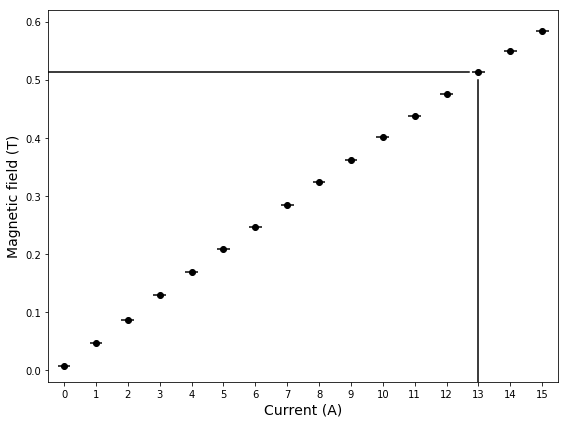

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I1, c*V1, yerr=err_B, xerr=.2, fmt='ko')
ax.plot([-1,12.7], [B, B], 'k-')
ax.plot([13,13], [-1, .5], 'k-')
ax.set_xlabel('Current (A)', fontsize=14)
ax.set_ylabel('Magnetic field (T)', fontsize=14)
ax.set_xticks(np.arange(0, 16, step=1))
ax.set_xbound(-.5,15.5)
ax.set_ybound(-.02,.62)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Magnetic_field_vs_current')

In [6]:
print(B)

0.5126328


## Check Ohmic behaviour

In [7]:
I2 = np.arange(10,160,10)
V2 = np.array([40.7,81.1,122.2,162.7,202.9,243.2,283.6,324.7,365.1,405.3,445.5,485.8,527.0,567.3,607.5])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(I2, V2)
print(slope2)
print(intercept2)
print(r_value2)
print(p_value2)
print(std_err2)

4.048107142857143
0.4580952380952681
0.99999885689099
4.6869276251004674e-38
0.001697616221964907


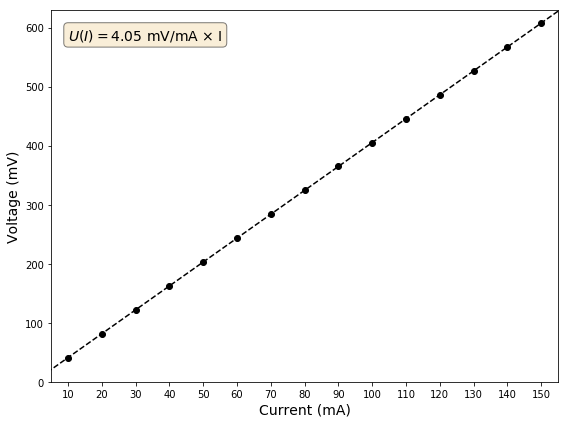

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I2, V2, yerr=.5, xerr=.05, fmt='ko')
x2 = np.linspace(0,160)
y2 = x2 * slope2 + intercept2
ax.plot(x2, y2, 'k--')
ax.set_xlabel('Current (mA)', fontsize=14)
ax.set_ylabel('Voltage (mV)', fontsize=14)
ax.set_xbound(5,155)
ax.set_ybound(0,630)
ax.set_xticks(np.arange(10,160,10))
ax.text(10,580, r"$U(I)={:.2f}$ mV/mA $\times$ I".format(slope2), fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_current_ohmic_test')

## Orientation of the sample

In [9]:
angle = np.arange(-90,100,10)
V = np.array([-9.22,-9.01,-8.82,-8.63,-8.45,-8.3,-8.17,-8.07,-8.01,-7.98,-7.98,-8.02,-8.10,-8.21,-8.35,-8.52,-8.7,-8.89,-9.09])

In [10]:
def fit_fun(angle, u0, u_offset, phi):
    return u0 * np.cos(angle + phi) + u_offset

In [11]:
popt, pcov = curve_fit(fit_fun, np.deg2rad(angle), V)

In [12]:
print(popt)
print(pcov)

[ 1.18225737 -9.15857643 -0.05483522]
[[ 1.03952611e-05 -6.25900777e-06  3.79884981e-07]
 [-6.25900777e-06  4.93574913e-06 -2.90595913e-07]
 [ 3.79884981e-07 -2.90595913e-07  1.60096857e-06]]


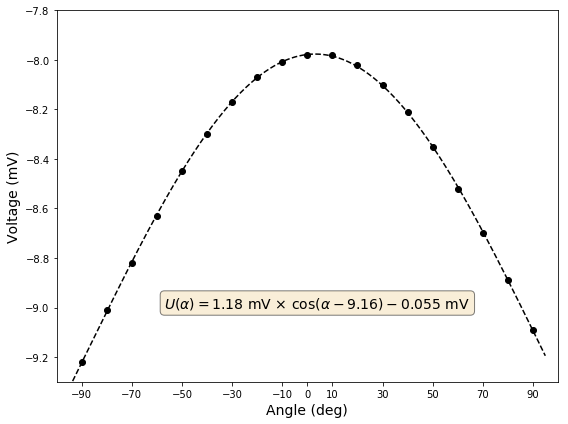

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(angle, V, yerr=5e-3, xerr=5e-1, fmt='ko')
x = np.deg2rad(np.arange(-95,95,.1))
y = fit_fun(x, *popt)
ax.plot(np.rad2deg(x), y, 'k--')
#ax.plot([5,5], [-12,-7.97], 'k-')
ax.set_xlabel('Angle (deg)', fontsize=14)
ax.set_ylabel('Voltage (mV)', fontsize=14)
ax.set_xbound(-100,100)
ax.set_ybound(-9.3,-7.8)
ax.set_xticks([-90,-70,-50,-30,-10,0,10,30,50,70,90])
ax.text(-57,-9, r"$U(\alpha)={:.2f}$ mV $\times$ $\cos(\alpha {:.2f}) {:.3f}$ mV".format(*popt),
        fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_angle')

## Dataset preparation

In [14]:
data1 = np.loadtxt('measurements.txt', comments='#')
T1 = data1[:, 0]
U_t1 = data1[:, 2]
U_off1 = data1[:, 1]
U_Hall1 = U_t1 - U_off1
U_op1 = data1[:, 3]
U_pm1 = data1[:, 4]
R_mn_op1 = np.abs(U_op1 / .1)
R_no_pm1 = np.abs(U_pm1 / .1)

In [15]:
err_R_mn_op1 = 1/.1 * 5e-3 + np.abs(U_op1) / .1**2 * 5e-4
err_R_no_pm1 = 1/.1 * 5e-3 + np.abs(U_pm1) / .1**2 * 5e-4

Data from other group

In [16]:
data2 = pd.read_excel('Data_Lettner_Schuele.xlsx', header=None,
                       names=['Temperature', 'Hall_Total_Voltage', 'Hall_Offset_Voltage', 'Voltage_OP', 'Voltage_PM'],
                       usecols='B:F', dtype=np.float64, skiprows=6)

In [17]:
data2.head()

,Temperature,Hall_Total_Voltage,Hall_Offset_Voltage,Voltage_OP,Voltage_PM
0,82.2,65.5,86.9,-159.6,-245.2
1,87.3,48.8,56.2,-107.0,-163.0
2,96.0,36.0,42.0,-84.0,-127.0
3,102.4,29.7,34.7,-67.0,-102.0
4,109.0,25.1,29.4,-58.0,-87.0


Plots of both our data and other group's data

In [18]:
T2 = data2['Temperature'].values
U_t2 = -data2['Hall_Total_Voltage'].values
U_off2 = -data2['Hall_Offset_Voltage'].values
U_Hall2 = U_t2 - U_off2
U_op2 = data2['Voltage_OP'].values
U_pm2 = data2['Voltage_PM'].values
# Fix missing sign in their data
U_pm2[26] *= -1
R_mn_op2 = np.abs(U_op2 / .1)
R_no_pm2 = np.abs(U_pm2 / .1)

In [19]:
err_R_mn_op2 = 1/.1 * 5e-3 + np.abs(U_op2) / .1**2 * 5e-4
err_R_no_pm2 = 1/.1 * 5e-3 + np.abs(U_pm2) / .1**2 * 5e-4

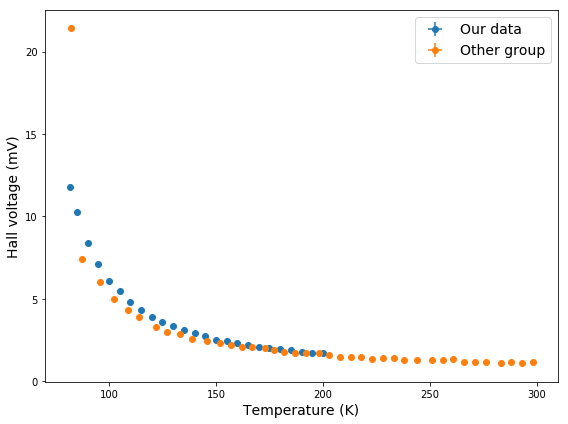

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Other group')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Hall voltage (mV)', fontsize=14)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Hall_voltage_vs_Temperature_both_datasets')

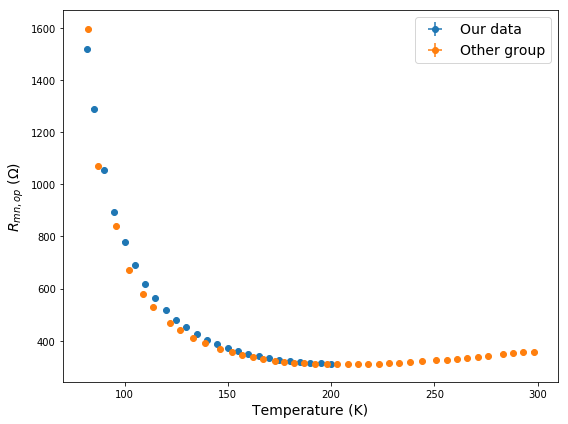

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_mn_op_vs_Temperature_both_datasets')

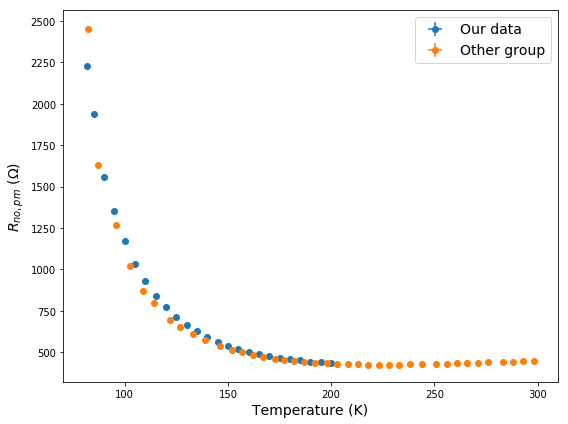

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_no_pm_vs_Temperature_both_datasets')

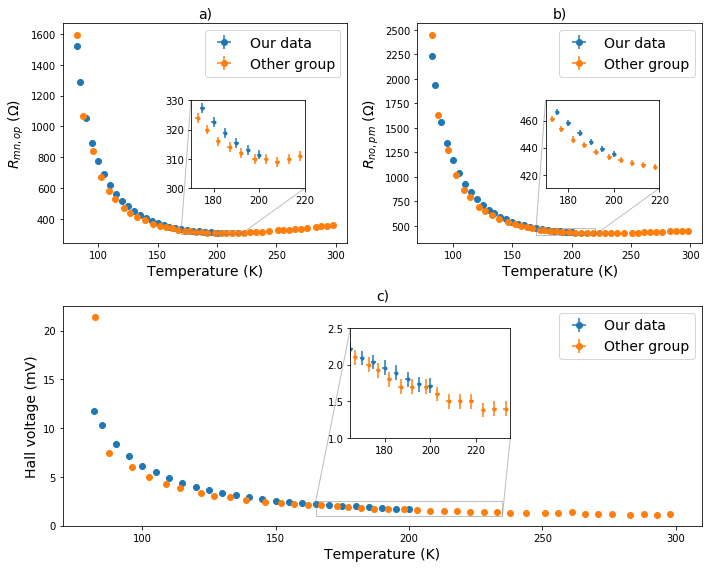

In [23]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=14)
ax1.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='o', label='Our data')
ax1.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='o', label='Other group')
ax1.legend(loc=0, fontsize=14)
ax1.set_xlabel('Temperature (K)', fontsize=14)
ax1.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax1.inset_axes([.45, .25, .4, .4], )
axins.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='.')
axins.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(300, 330)
ax1.indicate_inset_zoom(axins)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=14)
ax2.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='o', label='Our data')
ax2.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='o', label='Other group')
ax2.legend(loc=0, fontsize=14)
ax2.set_xlabel('Temperature (K)', fontsize=14)
ax2.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax2.inset_axes([.45, .25, .4, .4], )
axins.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='.')
axins.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(410, 475)
ax2.indicate_inset_zoom(axins)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('c)', fontsize=14)
ax3.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax3.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Other group')
ax3.set_xlabel('Temperature (K)', fontsize=14)
ax3.set_ylabel('Hall voltage (mV)', fontsize=14)
ax3.legend(loc=0, fontsize=14)
# Zoom area
axins = ax3.inset_axes([.45, .4, .25, .5], )
axins.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='.')
axins.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='.')
axins.set_xlim(165, 235)
axins.set_ylim(1, 2.5)
ax3.indicate_inset_zoom(axins)

plt.tight_layout()

if save_figs:
    save_fig(fig, 'comparison_datasets')

Combined data from our measurements and the other group

In [24]:
cut = 21

In [25]:
T3 = np.concatenate((T1, T2[cut:]))
U_t3 = np.concatenate((U_t1, U_t2[cut:]))
U_off3 = np.concatenate((U_off1, U_off2[cut:]))
U_Hall3 = U_t3 - U_off3
U_op3 = np.concatenate((U_op1, U_op2[cut:]))
U_pm3 = np.concatenate((U_pm1, U_pm2[cut:]))
R_mn_op3 = np.abs(U_op3 / .1)
R_no_pm3 = np.abs(U_pm3 / .1)
err_R_mn_op2 = 1/.1 * 5e-3 + np.abs(U_op3) / .1**2 * 5e-4
err_R_no_pm2 = 1/.1 * 5e-3 + np.abs(U_pm3) / .1**2 * 5e-4

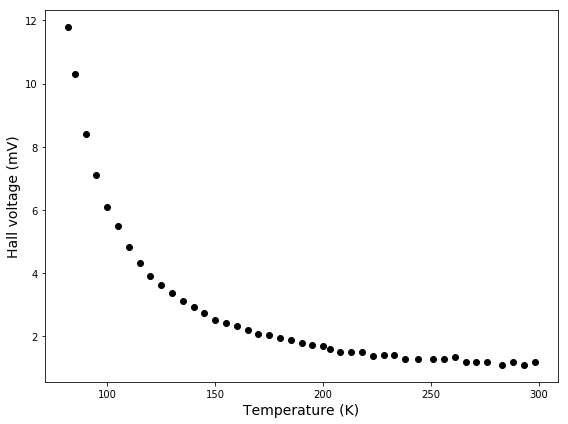

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, U_Hall3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Hall voltage (mV)', fontsize=14)
plt.tight_layout()

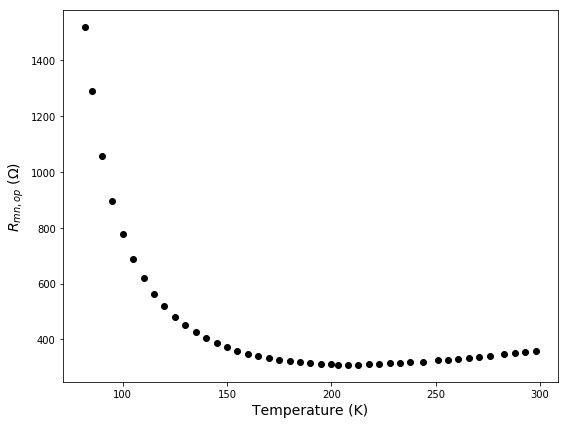

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_mn_op3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

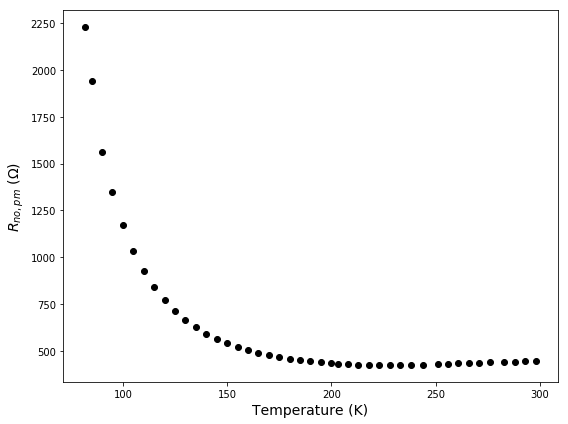

In [28]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_no_pm3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

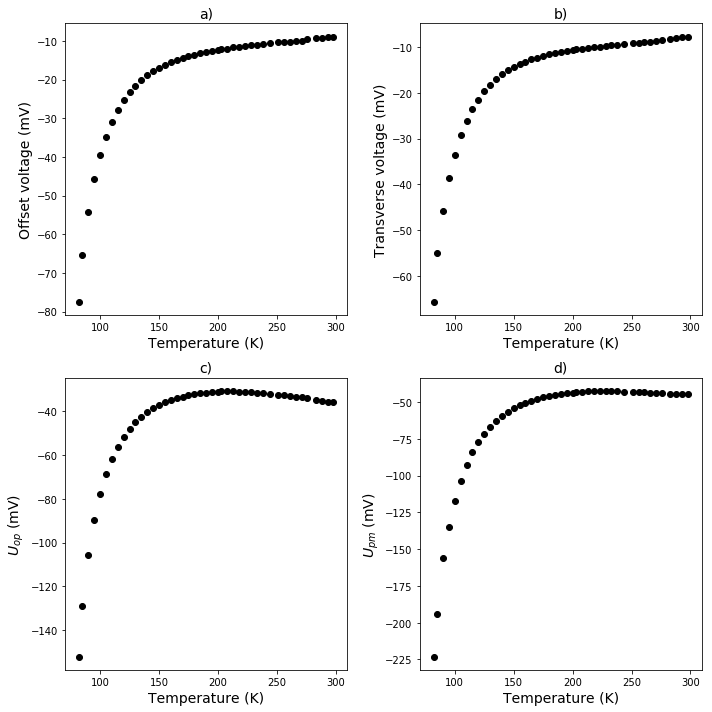

In [29]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=14)
ax1.errorbar(T3, U_off3, yerr=5e-3, xerr=1, fmt='ko')
ax1.set_xlabel('Temperature (K)', fontsize=14)
ax1.set_ylabel('Offset voltage (mV)', fontsize=14)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=14)
ax2.errorbar(T3, U_t3, yerr=5e-3, xerr=1, fmt='ko')
ax2.set_xlabel('Temperature (K)', fontsize=14)
ax2.set_ylabel('Transverse voltage (mV)', fontsize=14)

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('c)', fontsize=14)
ax3.errorbar(T3, U_op3, yerr=1e-3, xerr=1, fmt='ko')
ax3.set_xlabel('Temperature (K)', fontsize=14)
ax3.set_ylabel(r'$U_{op}$ (mV)', fontsize=14)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title('d)', fontsize=14)
ax4.errorbar(T3, U_pm3, yerr=1e-3, xerr=1, fmt='ko')
ax4.set_xlabel('Temperature (K)', fontsize=14)
ax4.set_ylabel(r'$U_{pm}$ (mV)', fontsize=14)

plt.tight_layout()

if save_figs:
    save_fig(fig, 'final_dataset')

In [30]:
data3 = pd.DataFrame(data={'Temperature':T3, 'Hall_Voltage':U_Hall3, 'R_mn_op':R_mn_op3, 'R_no_pm':R_no_pm3})

In [31]:
data3.head()

,Temperature,Hall_Voltage,R_mn_op,R_no_pm
0,82.0,11.8,1520.0,2230.0
1,85.0,10.3,1290.0,1940.0
2,90.0,8.4,1056.0,1560.0
3,95.0,7.1,895.1,1350.0
4,100.0,6.1,777.5,1171.0


In [32]:
#data3.to_csv('Combined_dataset.csv')
#data3.to_excel('Combined_dataset.xlsx')

## Determination of $p$ and $\mu$

In [372]:
def p_doping(T, Na, Ea):
    return 2 * Na / (1 + np.sqrt(1 + 16 * Na / Nv(T) * np.exp(Ea / (cte.Boltzmann * T))))

def p_doping_low_T(T, Na, Ea):
    return .5 * np.sqrt(Na * Nv(T)) * np.exp(-Ea / (2 * cte.Boltzmann * T))

def Nv(T):
    return 2 * (2 * np.pi * m_dh * cte.Boltzmann * T / (cte.Planck)**2)**(3/2)

In [368]:
d = 3.1e-3 # cm
I0 = 0.1e-3 # A
m_dh = 0.689 * cte.electron_mass
m_t = 0.1905 * cte.electron_mass
m_l = 0.9163 * cte.electron_mass

In [230]:
R_H3 = -U_Hall3 * d / (B * I0)
R_H2 = -U_Hall2 * d / (B * I0)
R_H1 = -U_Hall1 * d / (B * I0)

In [231]:
p3 = -1 / (cte.elementary_charge * R_H3)
p2 = -1 / (cte.elementary_charge * R_H2)
p1 = -1 / (cte.elementary_charge * R_H1)

[ 5.41507484e+16 -1.93686604e-22]
[[7.23555727e+32 2.44462349e+00]
 [2.44462349e+00 8.44149723e-33]]
[2.68989912e+16 9.18776209e-17]


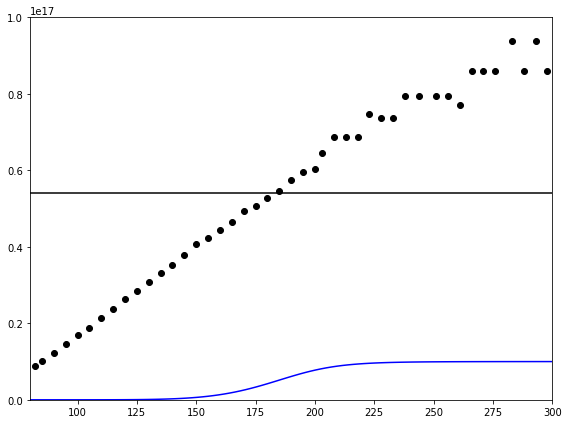

In [300]:
popt, pcov = curve_fit(p_doping, 1000/T3, p3, p0=(1e20, 1e-22), method='lm')
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, p3, 'ko')
T = np.linspace(78, 302, 100)
ax.plot(T, p_doping(T, *popt), 'k-')
ax.plot(T, p_doping(T, 1e16, 5e-20), 'b-')
ax.set_xbound(80, 300)
ax.set_ybound(0,1e17)
plt.tight_layout()

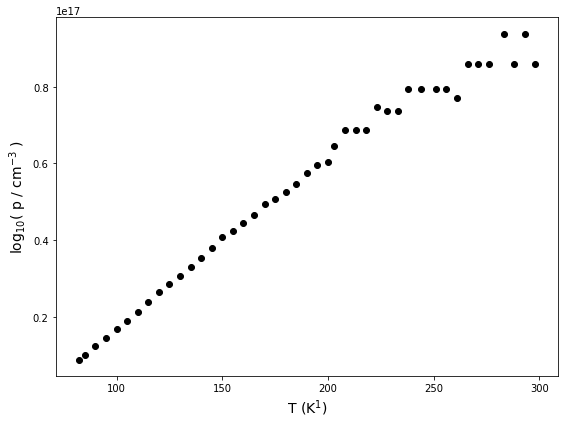

In [232]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, p3, 'ko')
ax.set_xlabel('T (K$^{1}$)', fontsize=14)
ax.set_ylabel('$\log_{10}($ p / cm$^{-3}$ )', fontsize=14)
plt.tight_layout()

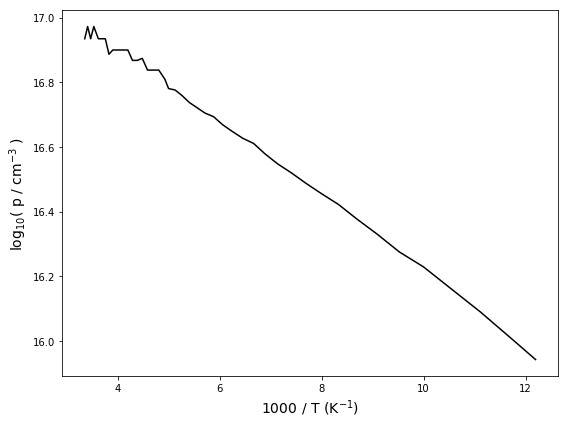

In [233]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, np.log10(p3), 'k-')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel('$\log_{10}($ p / cm$^{-3}$ )', fontsize=14)
plt.tight_layout()

In [343]:
popt, pcov = curve_fit(p_doping, 1000/T3, p3, p0=(1e20, 1e-22), method='lm')
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 5.41507484e+16 -1.93686604e-22]
[[7.23555727e+32 2.44462349e+00]
 [2.44462349e+00 8.44149723e-33]]
[2.68989912e+16 9.18776209e-17]


In [367]:
Nv(300)

1.4351610107942375e+25

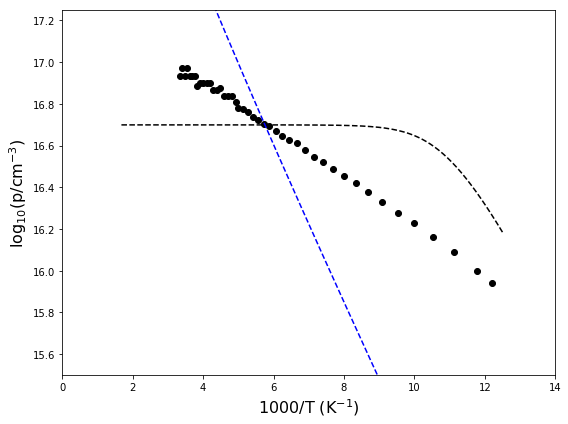

In [366]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, np.log10(p3), 'ko')
T = np.linspace(80, 600, 500)
ax.plot(1000/T, np.log10(p_doping(T, 5e16, 2e-20)), 'k--')
ax.plot(1000/T, np.log10(p_doping_low_T(T, 1e13, 2.1e-20)), 'b--')
ax.set_xlabel('1000/T (K$^{-1}$)', fontsize=16)
ax.set_ylabel('$\log_{10}($p/cm$^{-3}$)', fontsize=16)
ax.set_xbound(0,14)
ax.set_ybound(15.5,17.25)
plt.tight_layout() 

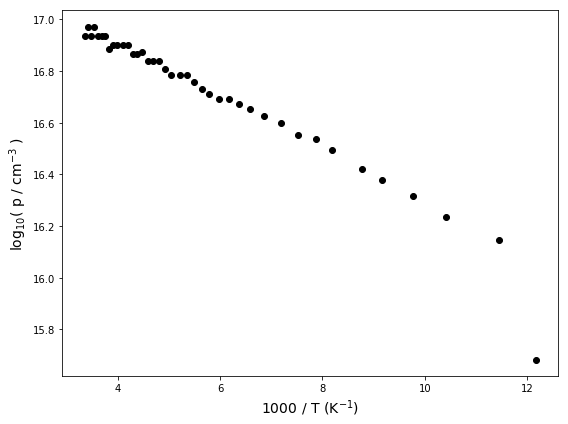

In [266]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
#ax.plot(1000/T1, np.log10(p1), 'o')
ax.plot(1000/T2, np.log10(p2), 'ko')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel('$\log_{10}($ p / cm$^{-3}$ )', fontsize=14)
plt.tight_layout()

In [288]:
def vdP(R, rho):
    return np.exp(-np.pi * R[0] * d / rho) + np.exp(-np.pi * R[1] * d / rho) - 1

In [289]:
def resistivity(R1, R2, d):
    f = 1 - ((R1 - R2) / (R1 + R2))**2 * np.log(2) / 2 - ((R1 - R2) / (R1 + R2))**4 * (np.log(2)**2 / 4 - np.log(2)**3 / 12)
    return np.pi * d / np.log(2) * (R1 + R2) / 2 * f

In [290]:
rho3 = resistivity(R_mn_op3, R_no_pm3, d)

In [296]:
rho3

array([26.01392341, 22.36934865, 18.13906038, 15.54531456, 13.49293584,
       11.93498649, 10.71217192,  9.73340248,  8.93755702,  8.2806433 ,
        7.74269381,  7.30070199,  6.92041621,  6.60715326,  6.33605378,
        6.11674649,  5.9272141 ,  5.76706209,  5.63301731,  5.5151658 ,
        5.42700463,  5.35025103,  5.28334243,  5.23377585,  5.19536438,
        5.15719385,  5.13672502,  5.13201525,  5.13356835,  5.14141904,
        5.15709309,  5.17273097,  5.19469308,  5.22442444,  5.26825763,
        5.2901541 ,  5.33258197,  5.36990077,  5.40587601,  5.45719583,
        5.5225402 ,  5.56604485,  5.6029957 ,  5.63121715])

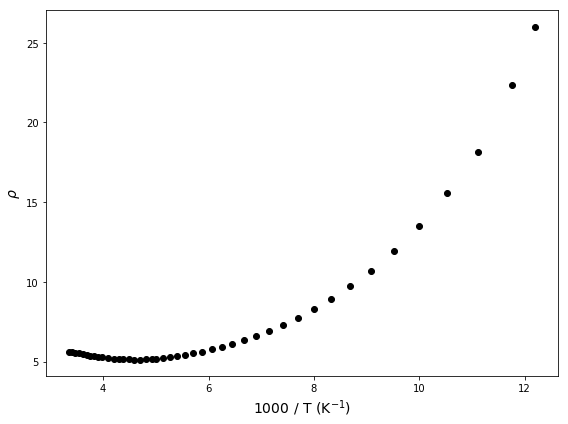

In [297]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, rho3, 'ko')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel(r'$\rho$', fontsize=14)
plt.tight_layout()

In [299]:
mu3 = np.abs(R_H3) / rho3

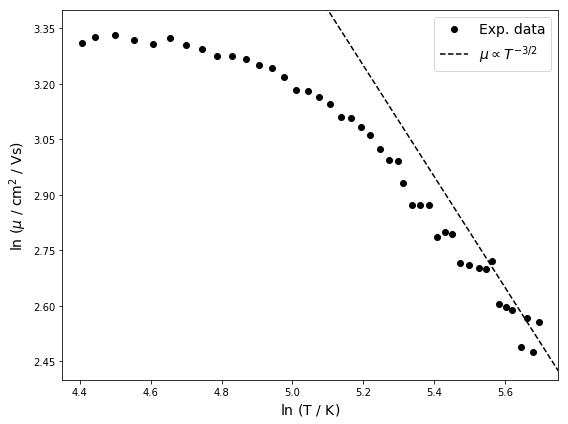

In [366]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.log(T3), np.log(mu3), 'ko', label='Exp. data')
t = np.linspace(80,320,10)
y = 11.05 + -3/2 * np.log(t)
ax.plot(np.log(t), y, 'k--', label=r'$\mu\propto T^{-3/2}$')
ax.set_xlabel(r'$\ln$ (T / K)', fontsize=14)
ax.set_ylabel(r'$\ln$ ($\mu$ / cm$^2$ / Vs)', fontsize=14)
ax.set_yticks(np.arange(2,4,.15))
ax.set_ybound(2.4,3.4)
ax.set_xbound(4.35,5.75)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()

In [346]:
-3/2 * np.log(t)

array([-6.57303995, -6.97298295, -7.28842606, -7.5489213 , -7.7708015 ,
       -7.9640508 , -8.13522076, -8.28884327, -8.42818389, -8.55567371])

In [271]:
popt, pcov = curve_fit(vdP, [R_mn_op3, R_no_pm3], np.zeros(len(R_mn_op3)))

In [272]:
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

[6.78094832]
[[0.20480065]]
[0.45254906]


In [274]:
np.exp(-np.pi * R_mn_op3 * d / popt[0]) + np.exp(-np.pi * R_no_pm3 * d / popt[0])

array([-0.84665393, -0.78153977, -0.6741491 , -0.57964214, -0.48659293,
       -0.4017701 , -0.32495889, -0.25608596, -0.19467847, -0.13998837,
       -0.09230338, -0.05104676, -0.01397403,  0.0177093 ,  0.04599405,
        0.06948148,  0.09023169,  0.10810048,  0.12329336,  0.13683952,
        0.14709062,  0.15610013,  0.16401977,  0.16993224,  0.17454521,
        0.17915465,  0.18162443,  0.18225704,  0.18211593,  0.18119776,
        0.17936536,  0.17753822,  0.17493793,  0.1714376 ,  0.16627387,
        0.16370144,  0.15869823,  0.15436259,  0.15016572,  0.14422452,
        0.13668556,  0.13169011,  0.12747636,  0.1242424 ])